In [1]:
from pathlib import Path
import pandas as pd

In [2]:
datafile = Path.cwd().parent.joinpath('data', 'case_data.csv')

In [3]:
col_names = ['Date', 'Location', 'AQI', 'Category', 'Range']
df = pd.read_csv(datafile)

In [4]:
df.rename(columns=dict(zip(df.columns, col_names)), inplace=True)

In [5]:
df.head()

,Date,Location,AQI,Category,Range
0,05-08-2020,DHAKAc,25,GOOD,NaN
1,05-08-2020,GAZIPURc,DNA,DNA,NaN
2,05-08-2020,NARAYANGANJc,22,GOOD,NaN
3,05-08-2020,CHITTAGONGc,DNA,DNA,NaN
4,05-08-2020,SYLHETc,40,GOOD,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20557 entries, 0 to 20556
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20544 non-null  object
 1   Location  20521 non-null  object
 2   AQI       19929 non-null  object
 3   Category  20507 non-null  object
 4   Range     4003 non-null   object
dtypes: object(5)
memory usage: 803.1+ KB


<h2> Location name requires some cleaning up due to inconsistent naming and inclusion of a measurement tag appended to the end. 

In [7]:
df.Location.value_counts()

Barisalc        1905
Gazipurc        1905
Narayanganjc    1905
Rajshahic       1905
Khulnac         1905
Sylhetc         1799
Chittagongb     1312
Dhakaa          1131
Chittagongc      587
Dhakab           495
BARISHALc        409
SYLHETc          409
MYMENSINGHc      409
CUMILLAc         409
SAVARc           409
NARAYANGANJc     409
RAJSHAHIc        409
KHULNAc          409
RANGPURc         409
CHITTAGONGc      408
GAZIPURc         408
NARSINGDIc       364
DHAKAc           220
DHAKAb           189
Dhakac           182
DhakaC            97
Sylhetcc          92
Sylhetc2          14
NARSINGDI          9
ChittagongC        5
gongb              1
CHITTAGONGb        1
114AZIPURc         1
Name: Location, dtype: int64

In [8]:
#  Remove differences due to upper and lower case names
df['Location'] = df.Location.apply(lambda x: str(x).lower())

In [9]:
df.Location.value_counts()

narayanganjc    2314
khulnac         2314
rajshahic       2314
gazipurc        2313
sylhetc         2208
barisalc        1905
chittagongb     1313
dhakaa          1131
chittagongc     1000
dhakab           684
dhakac           499
mymensinghc      409
cumillac         409
savarc           409
barishalc        409
rangpurc         409
narsingdic       364
sylhetcc          92
nan               36
sylhetc2          14
narsingdi          9
gongb              1
114azipurc         1
Name: Location, dtype: int64

The final letter represents a measure tag, specifically " (a),(b) and (c) Refer to the AQI Average in one city based on three, two and one CAMS respectively.". We should retain this information as it may be a proxy for data reliability.

In [10]:
#  Inspect the nan locations:
df[df['Location']=='nan'].head()

,Date,Location,AQI,Category,Range
15428,10-06-2019,nan,NaN,NaN,NaN
15441,09-06-2019,nan,NaN,NaN,NaN
15454,11-06-2019,nan,NaN,NaN,NaN
15483,12-06-2019,nan,NaN,NaN,NaN
15496,13-06-2019,nan,NaN,NaN,NaN


In [11]:
#  Reject these clearly nonsensical entries
df = df[df['Location']!='nan']

In [12]:
df['CAMS tag'] = df['Location'].apply(lambda x: x[-1])

In [13]:
df['CAMS tag'].value_counts()

c    17369
b     1998
a     1131
2       14
i        9
Name: CAMS tag, dtype: int64

In [14]:
df[df['CAMS tag'].isin(['2','i'])]

,Date,Location,AQI,Category,Range,CAMS tag
13372,25-09-2018,sylhetc2,51,MODERATE,NaN,2
13396,26-09-2018,sylhetc2,75,MODERATE,NaN,2
13404,28-09-2018,sylhetc2,103,CAUTION,NaN,2
13412,29-09-2018,sylhetc2,102,CAUTION,NaN,2
13420,27-09-2018,sylhetc2,80,MODERATE,NaN,2
13428,03-10-2018,sylhetc2,129,CAUTION,NaN,2
13436,02-10-2018,sylhetc2,131,CAUTION,NaN,2
13444,30-09-2018,sylhetc2,130,CAUTION,NaN,2
13452,01-10-2018,sylhetc2,118,CAUTION,NaN,2
13460,04-10-2018,sylhetc2,114,CAUTION,NaN,2


It appears that some dates in Oct 2018 acquired a c2 tag for Sylhet, but with no indication about what this means. I shall assume its the usual c tag and replace it accordingly. 

The other invalid tag is from some data from Narsingdi in July 2019 which appears to have had the tag ommited. Will assume "c" in these cases also. 

In [15]:
df['CAMS tag'].replace({'2':'c', 'i':'c'}, inplace=True)

In [16]:
df['CAMS tag'].value_counts()

c    17392
b     1998
a     1131
Name: CAMS tag, dtype: int64

In [17]:
#  Strip the tags from location names
df['Location'] = df['Location'].apply(lambda x: str(x)[:-1])

In [18]:
df['Location'].value_counts()

rajshahi       2314
narayanganj    2314
khulna         2314
dhaka          2314
gazipur        2313
chittagong     2313
sylhet         2208
barisal        1905
mymensingh      409
cumilla         409
barishal        409
savar           409
rangpur         409
narsingdi       364
sylhetc         106
narsingd          9
gong              1
114azipur         1
Name: Location, dtype: int64

In [19]:
df['Location'] = df['Location'].replace({'barisal': 'barishal', 
                        'narsingd': 'narsingdi', 
                        'sylhetc': 'sylhet', 
                        '114azipur': 'gazipur', 
                        'gong': 'chittagong'})

In [20]:
df['Location'].value_counts()

narayanganj    2314
barishal       2314
chittagong     2314
sylhet         2314
gazipur        2314
dhaka          2314
khulna         2314
rajshahi       2314
savar           409
cumilla         409
mymensingh      409
rangpur         409
narsingdi       373
Name: Location, dtype: int64

Finally, a series of unique city names!

<h2> Inspect missing dates </h2>

In [21]:
df[df.Date.isnull()]

,Date,Location,AQI,Category,Range,CAMS tag
19075,NaN,dhaka,159,VERY UNHEALTHY,NaN,c
19076,NaN,gazipur,135,UNHEALTHY,NaN,c
19077,NaN,narayanganj,145,UNHEALTHY,NaN,c
19078,NaN,chittagong,DNA,DNA,NaN,c
19079,NaN,sylhet,DNA,DNA,NaN,c
19080,NaN,khulna,82,CAUTION,NaN,c
19081,NaN,rajshahi,165,UNHEALTHY,NaN,c
19082,NaN,barishal,DNA,DNA,NaN,c
19083,NaN,savar,DNA,DNA,NaN,c
19084,NaN,mymensingh,DNA,DNA,NaN,c


In [22]:
df.loc[19070:19090]

,Date,Location,AQI,Category,Range,CAMS tag
19070,30-03-2020,savar,DNA,DNA,NaN,c
19071,30-03-2020,mymensingh,DNA,DNA,NaN,c
19072,30-03-2020,rangpur,DNA,DNA,NaN,c
19073,30-03-2020,cumilla,DNA,DNA,NaN,c
19074,30-03-2020,narsingdi,DNA,DNA,NaN,c
19075,NaN,dhaka,159,VERY UNHEALTHY,NaN,c
19076,NaN,gazipur,135,UNHEALTHY,NaN,c
19077,NaN,narayanganj,145,UNHEALTHY,NaN,c
19078,NaN,chittagong,DNA,DNA,NaN,c
19079,NaN,sylhet,DNA,DNA,NaN,c


A quick inspection of the webpage where data scrapped from, around the dates above, shows a hyperlink with the date text missing. 

This links to a duplicate page of the 02 April 2020 data. Which we can verify here:

In [23]:
df[df.Date=='02-04-2020']

,Date,Location,AQI,Category,Range,CAMS tag
19101,02-04-2020,dhaka,159,VERY UNHEALTHY,NaN,c
19102,02-04-2020,gazipur,135,UNHEALTHY,NaN,c
19103,02-04-2020,narayanganj,145,UNHEALTHY,NaN,c
19104,02-04-2020,chittagong,DNA,DNA,NaN,c
19105,02-04-2020,sylhet,DNA,DNA,NaN,c
19106,02-04-2020,khulna,82,CAUTION,NaN,c
19107,02-04-2020,rajshahi,165,UNHEALTHY,NaN,c
19108,02-04-2020,barishal,DNA,DNA,NaN,c
19109,02-04-2020,savar,DNA,DNA,NaN,c
19110,02-04-2020,mymensingh,DNA,DNA,NaN,c


In [24]:
df.dropna(subset=['Date'], inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20508 entries, 0 to 20556
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20508 non-null  object
 1   Location  20508 non-null  object
 2   AQI       19916 non-null  object
 3   Category  20494 non-null  object
 4   Range     4003 non-null   object
 5   CAMS tag  20508 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


In [26]:
df[df['AQI']=='DNA']

,Date,Location,AQI,Category,Range,CAMS tag
1,05-08-2020,gazipur,DNA,DNA,NaN,c
3,05-08-2020,chittagong,DNA,DNA,NaN,c
5,05-08-2020,khulna,DNA,DNA,NaN,c
7,05-08-2020,barishal,DNA,DNA,NaN,c
8,05-08-2020,savar,DNA,DNA,NaN,c
...,...,...,...,...,...,...
20548,21-07-2020,sylhet,DNA,DNA,NaN,c
20551,21-07-2020,barishal,DNA,DNA,NaN,c
20552,21-07-2020,savar,DNA,DNA,NaN,c
20555,21-07-2020,cumilla,DNA,DNA,NaN,c


There are many entries where the AQI data is not avaiable, these are labelled as "DNA", "Data Not Avaiable" (and variations there of). Lets convert these strings to NaNs:

In [27]:
import numpy as np
df['AQI'].replace({'DNA': np.nan, 'DNA*': np.nan, 'DATA NOT AVAILABLE': np.nan}, inplace=True)

In [28]:
df['AQI'].isnull().value_counts()

False    16341
True      4167
Name: AQI, dtype: int64

In [33]:
df = df.astype({'AQI': float})

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20508 entries, 0 to 20556
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      20508 non-null  object 
 1   Location  20508 non-null  object 
 2   AQI       16341 non-null  float64
 3   Category  20494 non-null  object 
 4   Range     4003 non-null   object 
 5   CAMS tag  20508 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.1+ MB


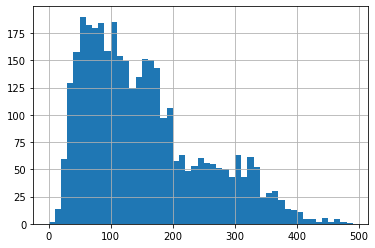

In [35]:
df.dropna()['AQI'].hist(bins=range(0,500,10))

In [38]:
df['Date'] = pd.to_datetime(df['Date'], errors = 'coerce')

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


(735234.0, 737669.0)

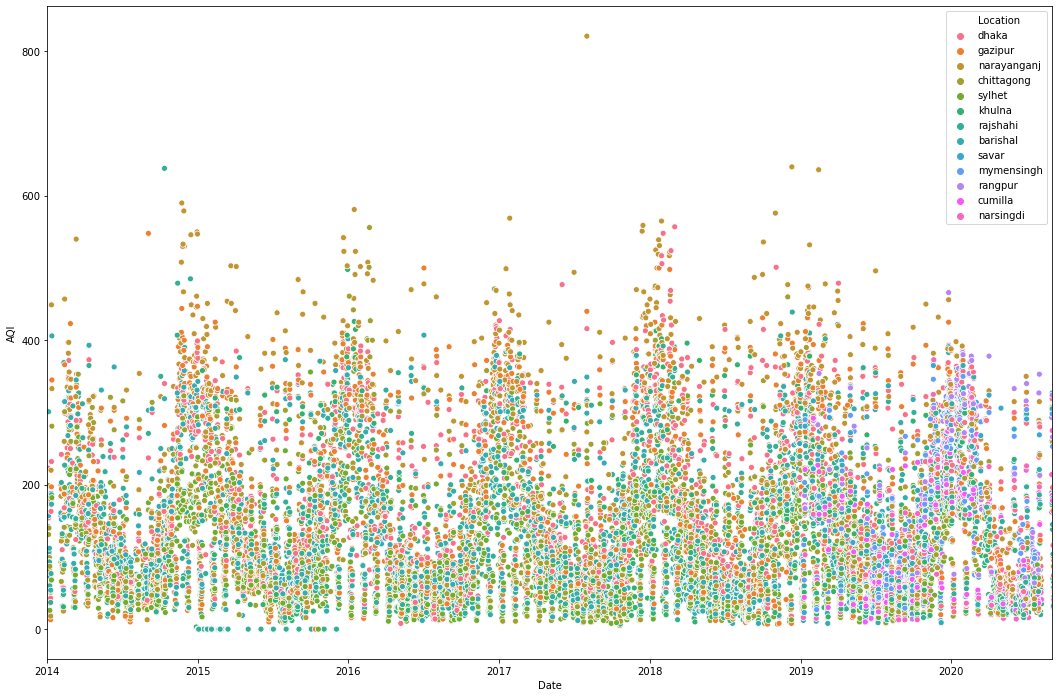

In [52]:
fig = plt.figure(figsize=(18,12))
sns.scatterplot(data=df, x='Date', y='AQI', hue='Location')
plt.xlim(datetime.strptime('2014-01-01', "%Y-%m-%d"), datetime.strptime('2020-09-01', "%Y-%m-%d"))